# Fake News -- PROOFREAD YOU FOOL

* Problem
* Dataset
* Exploratory Analysis
* Count Vectorizing
* Document Clustering with K-Means
* Latent Dirichlet Allocation & Topic Distribution
* Analysis & Limitations
* Future Analysis

## Problem & Hypothesis

Fake news became a trending topic after multiple news sites looked into its influence on Trump's election. Facebook is trying to get users to manually classify fake news and plans to use that information to flag fake news sites to users.

The goal of this project is to analyze fake news stories and try to identify similarities in order to make it easier to differentiate legitimate news from fake posts. This project could have a big impact given the spread of fake news on social media and its growing impact on society.

## Dataset

I’ll be using a dataset of fake news from kaggle that includes domain, author, date published, article title, article text, spam score, number of facebook likes. The articles are from October-November.

#### Limitations

The dataset was built using a chrome extension BS detector, which is a list of domains made by some rando who classified the sites, so it this isn’t a comprehensive list of sites and would include that person’s biases.
With more time, next steps would include building a dataset with news from all news sources and training a model to classify news as real or fake.

## Exploratory Analysis

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import json
import pylab as pl
%matplotlib inline

data = pd.read_csv("../projects/final-projects/fake.csv")
print data.head()

                                       uuid  ord_in_thread  \
0  6a175f46bcd24d39b3e962ad0f29936721db70db              0   
1  2bdc29d12605ef9cf3f09f9875040a7113be5d5b              0   
2  c70e149fdd53de5e61c29281100b9de0ed268bc3              0   
3  7cf7c15731ac2a116dd7f629bd57ea468ed70284              0   
4  0206b54719c7e241ffe0ad4315b808290dbe6c0f              0   

                 author                      published  \
0     Barracuda Brigade  2016-10-26T21:41:00.000+03:00   
1  reasoning with facts  2016-10-29T08:47:11.259+03:00   
2     Barracuda Brigade  2016-10-31T01:41:49.479+02:00   
3                Fed Up  2016-11-01T05:22:00.000+02:00   
4                Fed Up  2016-11-01T21:56:00.000+02:00   

                                               title  \
0  Muslims BUSTED: They Stole Millions In Gov’t B...   
1  Re: Why Did Attorney General Loretta Lynch Ple...   
2  BREAKING: Weiner Cooperating With FBI On Hilla...   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...  

In [35]:
data.count()

uuid                  12999
ord_in_thread         12999
author                10575
published             12999
title                 12319
text                  12953
language              12999
crawled               12999
site_url              12999
country               12823
domain_rank            8776
thread_title          12987
spam_score            12999
main_img_url           9356
replies_count         12999
participants_count    12999
likes                 12999
comments              12999
shares                12999
type                  12999
dtype: int64

In [36]:
data.describe()

,ord_in_thread,domain_rank,spam_score,replies_count,participants_count,likes,comments,shares
count,12999.000000,8776.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000
mean,0.891530,38092.996582,0.026122,1.383183,1.727518,10.831833,0.038311,10.831833
std,6.486822,26825.487454,0.122889,9.656838,6.884239,79.798949,0.827335,79.798949
min,0.000000,486.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,100.000000,98679.000000,1.000000,309.000000,240.000000,988.000000,65.000000,988.000000


In [37]:
data.dropna()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
5,8f30f5ea14c9d5914a9fe4f55ab2581772af4c31,0,Barracuda Brigade,2016-11-02T16:31:28.550+02:00,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,english,2016-11-02T16:31:28.550+02:00,100percentfedup.com,US,25689.0,Hillary Goes Absolutely Berserk On Protester A...,0.000,http://bb4sp.com/wp-content/uploads/2016/11/Fu...,0,1,0,0,0,bias
6,d3cc0fe38f41a59f7c48f8c3528ca5f74193148f,0,Fed Up,2016-11-04T19:40:00.000+02:00,BREAKING! NYPD Ready To Make Arrests In Weiner...,BREAKING! NYPD Ready To Make Arrests In Weiner...,english,2016-11-05T02:13:46.065+02:00,100percentfedup.com,US,25689.0,BREAKING! NYPD Ready To Make Arrests In Weiner...,0.701,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
7,b4bbf8b5c19e8864f5257832a58b81ef4ed2d4e4,0,Fed Up,2016-11-05T01:19:00.000+02:00,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,BREAKING! NYPD Ready To Make Arrests In Weiner...,english,2016-11-05T05:59:07.458+02:00,100percentfedup.com,US,25689.0,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,0.188,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
8,a19aabaa5a61eb8bc22fadaaa003e5fbba5c4bf6,0,Fed Up,2016-11-06T23:54:00.000+02:00,BREAKING: CLINTON CLEARED...Was This A Coordin...,\nLimbaugh said that the revelations in the Wi...,english,2016-11-07T10:20:06.409+02:00,100percentfedup.com,US,25689.0,BREAKING: CLINTON CLEARED...Was This A Coordin...,0.144,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
9,f54d8e13010d0a79893995ee65360ad4b38b5a35,0,Fed Up,2016-11-07T02:43:00.000+02:00,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",Email \nThese people are sick and evil. They w...,english,2016-11-07T10:20:27.252+02:00,100percentfedup.com,US,25689.0,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",0.995,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


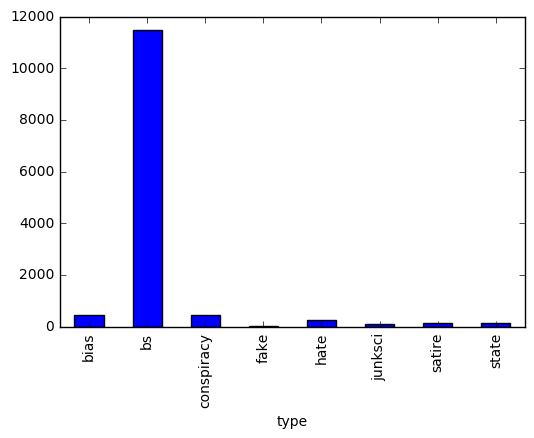

In [38]:
# why the BS Detector extension classified the news as fake
data.groupby(['type']).size().plot(kind='bar')

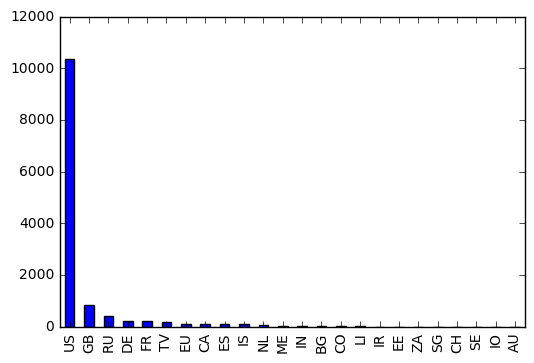

In [39]:
#where the fake news comes from
data['country'].value_counts().plot(kind='bar')

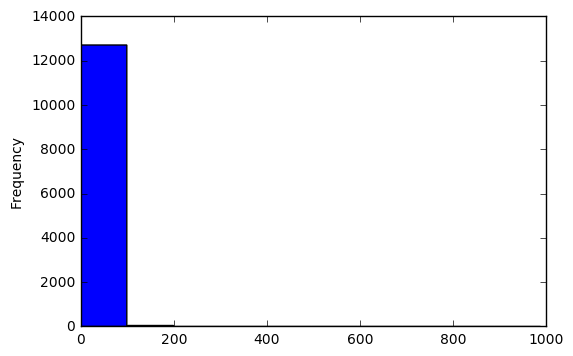

In [40]:
#how frequently fake news gets shared
data['shares'].plot(kind='hist')

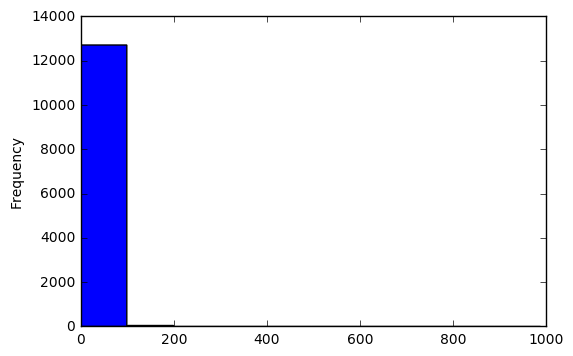

In [41]:
data['likes'].plot(kind='hist')

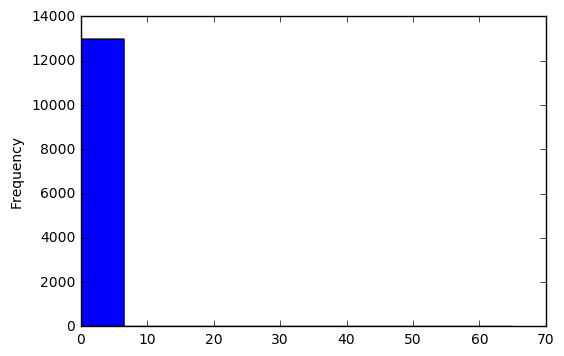

In [42]:
data['comments'].plot(kind='hist')

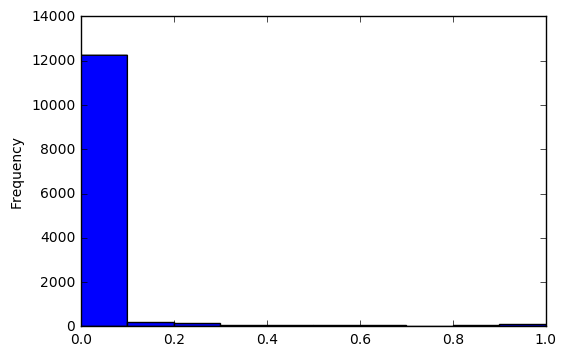

In [43]:
data['spam_score'].plot(kind='hist')

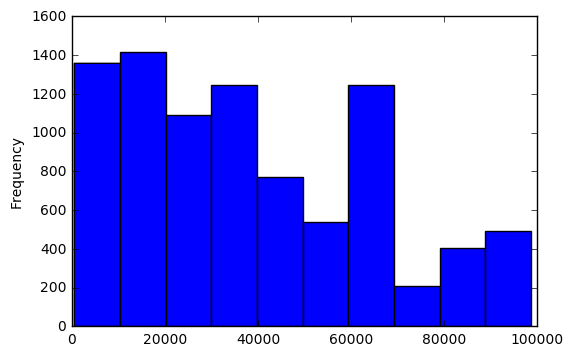

In [44]:
data['domain_rank'].plot(kind='hist')

In [45]:
# Correlation between likes & shares
data.corr()

,ord_in_thread,domain_rank,spam_score,replies_count,participants_count,likes,comments,shares
ord_in_thread,1.000000,-0.184794,-0.018859,0.830462,0.760739,-0.018657,-0.006365,-0.018657
domain_rank,-0.184794,1.000000,-0.027991,-0.174894,-0.177657,-0.201984,-0.076436,-0.201984
spam_score,-0.018859,-0.027991,1.000000,-0.007477,-0.019813,0.041199,-0.004444,0.041199
replies_count,0.830462,-0.174894,-0.007477,1.000000,0.971898,-0.019056,-0.006595,-0.019056
participants_count,0.760739,-0.177657,-0.019813,0.971898,1.000000,-0.020136,-0.008447,-0.020136
likes,-0.018657,-0.201984,0.041199,-0.019056,-0.020136,1.000000,0.158758,1.000000
comments,-0.006365,-0.076436,-0.004444,-0.006595,-0.008447,0.158758,1.000000,0.158758
shares,-0.018657,-0.201984,0.041199,-0.019056,-0.020136,1.000000,0.158758,1.000000


## Count Vectorizer

In [52]:
text = data['text'].fillna('')

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features = 1000,
                             ngram_range=(1, 2),
                             stop_words='english',
                             binary=True)

vectorizer.fit(text)

body = vectorizer.transform(text)

## Topic Distribution

I was going to use LDA to find the topic distribution because I thought it would be a good way to visualize word probability, but then I realized a word cloud is a much easier and prettier way to do that.

In [56]:
import sklearn.feature_extraction.text as ext

from nltk.corpus import stopwords
import string

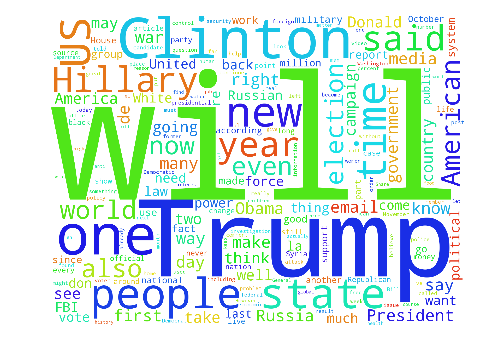

In [60]:
from wordcloud import WordCloud, STOPWORDS

wordcloud2 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=2000,
                          height=1500
                         ).generate(" ".join(text))


plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

## Sentiment Analysis

In [35]:
import sys
from textblob import TextBlob

In [36]:
def stringToSentiment(text):
    return TextBlob(text.decode('utf-8', 'ignore')).sentiment.polarity

In [37]:
stringToSentiment('Re: Why Did Attorney General Loretta Lynch Plead The Fifth?')

0.05000000000000002

In [38]:
stringToSentiment('BREAKING: Weiner Cooperating With FBI On Hillary Email Investigation')

0.0

In [39]:
stringToSentiment('Hillary Goes Absolutely Berserk On Protester At Rally! (Video)')

0.25

In [55]:
stringToSentiment('BREAKING! NYPD Ready To Make Arrests In Weiner Case…Hillary Visited Pedophile Island At Least 6 Times…Money Laundering, Underage Sex, Pay-for-Play,Proof of Inappropriate Handling Classified Information')

-0.04999999999999999

In [54]:
stringToSentiment('WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Massive Voter Fraud: Trump Campaign Readies Lawsuit Against FL Sec Of Elections In Critical District [VIDEO]')

-0.095

In [46]:
stringToSentiment('DONALD TRUMP Calls Meeting With Press…Dresses Down Real Fake News Networks: “Everyone at CNN is a liar and you should be ashamed”')

-0.4527777777777778

In [49]:
stringToSentiment('WikiLeaks: Hillary Clinton knew Saudi, Qatar were funding ISIS – but still took their money for Foundation ')

0.0

In [53]:
#how to apply to whole dataframe
body.apply(stringToSentiment)

AttributeError: apply not found

## Analysis
***analysis of everything***



## Future Analysis

Future analysis would ideally involve data that includes legitimate news sources with more nuanced information on their biases. The information on the biases would not be modelled after one person's manual classifation of the site.

regression on other shiz